https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction/data

https://www.kaggle.com/code/gsivakumar/step-by-step-approach-for-mortality-prediction/notebook

Outcome: 0 is alive, 1 is death

Gendera: 1 is male, 2 is female

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.float_format = "{:,.2f}".format
df = pd.read_csv('data/data01.csv')
df.head(10)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.00,72,1,37.59,0,0,0,1,...,138.75,7.46,109.17,13.17,2.62,7.23,21.17,0.50,40.00,55
1,1,139812,0.00,75,2,NaN,0,0,0,0,...,138.89,8.16,98.44,11.44,1.89,7.22,33.44,0.50,78.00,55
2,1,109787,0.00,83,2,26.57,0,0,0,0,...,140.71,8.27,105.86,10.00,2.16,7.27,30.57,0.50,71.50,35
3,1,130587,0.00,43,2,83.26,0,0,0,0,...,138.50,9.48,92.07,12.36,1.94,7.37,38.57,0.60,75.00,55
4,1,138290,0.00,75,2,31.82,1,0,0,0,...,136.67,8.73,104.50,15.17,1.65,7.25,22.00,0.60,50.00,55
5,1,154653,0.00,76,1,24.26,1,1,0,0,...,136.25,8.47,96.75,13.12,1.77,7.31,30.50,0.60,65.50,35
6,1,194420,0.00,72,1,39.67,1,0,0,0,...,144.13,8.78,106.67,15.20,1.88,7.17,26.80,0.62,69.77,55
7,1,153461,0.00,83,2,22.31,1,1,0,1,...,140.00,9.17,104.25,12.57,2.19,7.55,27.57,0.65,31.33,75
8,1,113076,0.00,61,2,19.99,1,1,0,1,...,141.09,9.44,103.18,16.86,2.04,7.36,25.77,0.67,46.00,50
9,1,147252,0.00,67,1,45.03,1,0,0,1,...,142.30,8.15,97.60,12.00,2.20,7.36,36.70,0.70,67.00,55


In [4]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [46]:
print(df["Diastolic blood pressure"].isna().sum())
diast = df["Diastolic blood pressure"]
DF1 = df.loc[df['Diastolic blood pressure'].notnull()]
DF1["Diastolic blood pressure"].isna().sum()

16


0

0.03204823242311075 136.53829375820087
0.10392392920760779
0.0003898811622192567


<Axes: xlabel='age', ylabel='Blood sodium'>

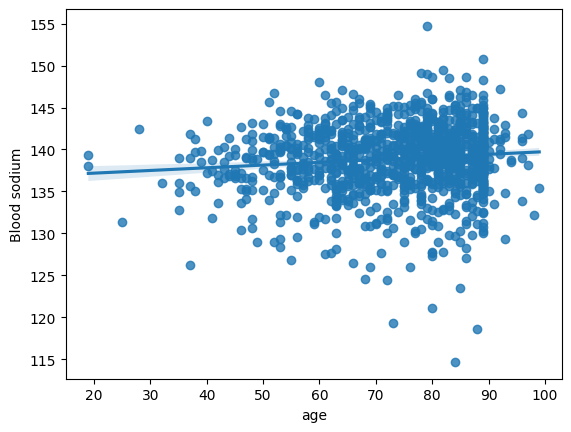

In [56]:
col_to_analyze = "Blood sodium"
plot = sns.regplot(data=DF1, x="age", y=col_to_analyze)
slope, intercept, R, p, sterr = scipy.stats.linregress(x=DF1["age"],
                                                       y=DF1[col_to_analyze])
print(slope, intercept)
print(R)
print(p)
plot

In [ ]:
col = "age"
print("Alive", df.loc[df["outcome"]==0][col].mean())
print("Dead", df.loc[df["outcome"]==1][col].mean())

Alive 73.70501474926253
Dead 76.23899371069183


Text(0.5, 1.0, 'Histogram of Age (Red: dead, Blue: alive)')

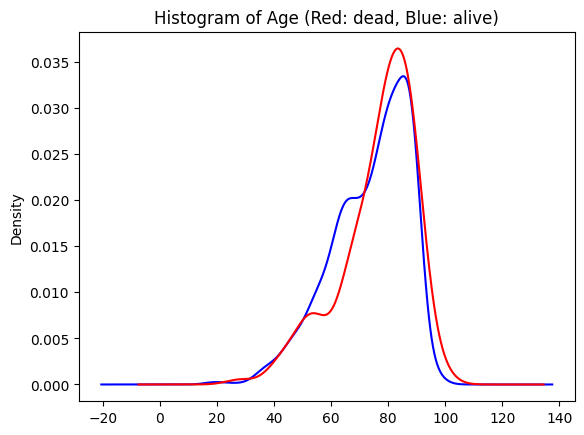

In [ ]:
# sns.scatterplot(data=df, x=col, y="outcome")
df.loc[df["outcome"]==0][col].plot(kind="kde", color="blue")
df.loc[df["outcome"]==1][col].plot(kind="kde", color="red")
plt.title("Histogram of Age (Red: dead, Blue: alive)")

In [ ]:
df[col].min()

19